In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_employee = pd.read_csv("employee.csv")
data_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000
5,6,ina,5/6/1991,perempuan,5000000
6,7,nia,4/5/1990,perempuan,2500000
7,8,dodi,4/3/1998,laki-laki,3400000
8,9,dedi,6/20/1993,laki-laki,8900000
9,10,roni,9/20/2001,laki-laki,2100000


In [17]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             10 non-null     int64 
 1   nama           10 non-null     object
 2   tanggal_lahir  10 non-null     object
 3   jenis_kelamin  10 non-null     object
 4   gaji           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [18]:
#merubah object to datetime
data_employee['tanggal_lahir'] = pd.to_datetime(data_employee['tanggal_lahir'])
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             10 non-null     int64         
 1   nama           10 non-null     object        
 2   tanggal_lahir  10 non-null     datetime64[ns]
 3   jenis_kelamin  10 non-null     object        
 4   gaji           10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 528.0+ bytes


In [19]:
jk_dammies = pd.get_dummies(data_employee['jenis_kelamin'],prefix='jk')
jk_dammies

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [20]:
data_employee_jk = pd.concat([data_employee,jk_dammies],axis=1)
data_employee_jk

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1
5,6,ina,1991-05-06,perempuan,5000000,0,1
6,7,nia,1990-04-05,perempuan,2500000,0,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0


In [21]:
del data_employee_jk['jenis_kelamin']

In [22]:
data_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,1000000,0,1
1,2,budi,1992-03-01,2000000,1,0
2,3,susi,2000-04-05,1350000,0,1
3,4,wati,1995-05-20,10000000,0,1
4,5,ati,1994-04-23,3400000,0,1
5,6,ina,1991-05-06,5000000,0,1
6,7,nia,1990-04-05,2500000,0,1
7,8,dodi,1998-04-03,3400000,1,0
8,9,dedi,1993-06-20,8900000,1,0
9,10,roni,2001-09-20,2100000,1,0


In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
le = LabelEncoder()

In [38]:
data_employee_jk['jk_label'] = le.fit_transform(data_employee['jenis_kelamin'])
data_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,sc_gaji,mx_gaji,jk_label
0,1,ani,1993-03-02,1000000,0,1,-1.001779,0.000000,1
1,2,budi,1992-03-01,2000000,1,0,-0.663911,0.111111,0
2,3,susi,2000-04-05,1350000,0,1,-0.883525,0.038889,1
3,4,wati,1995-05-20,10000000,0,1,2.039035,1.000000,1
4,5,ati,1994-04-23,3400000,0,1,-0.190896,0.266667,1
5,6,ina,1991-05-06,5000000,0,1,0.349694,0.444444,1
6,7,nia,1990-04-05,2500000,0,1,-0.494977,0.166667,1
7,8,dodi,1998-04-03,3400000,1,0,-0.190896,0.266667,0
8,9,dedi,1993-06-20,8900000,1,0,1.667380,0.877778,0
9,10,roni,2001-09-20,2100000,1,0,-0.630124,0.122222,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
data_employee_jk['sc_gaji'] = sc.fit_transform(data_employee[['gaji']])
data_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,sc_gaji
0,1,ani,1993-03-02,1000000,0,1,-1.001779
1,2,budi,1992-03-01,2000000,1,0,-0.663911
2,3,susi,2000-04-05,1350000,0,1,-0.883525
3,4,wati,1995-05-20,10000000,0,1,2.039035
4,5,ati,1994-04-23,3400000,0,1,-0.190896
5,6,ina,1991-05-06,5000000,0,1,0.349694
6,7,nia,1990-04-05,2500000,0,1,-0.494977
7,8,dodi,1998-04-03,3400000,1,0,-0.190896
8,9,dedi,1993-06-20,8900000,1,0,1.667380
9,10,roni,2001-09-20,2100000,1,0,-0.630124


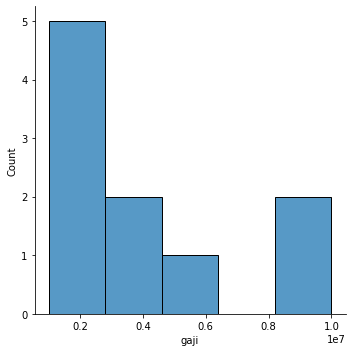

In [30]:
sns.displot(data_employee['gaji'])
plt.show()

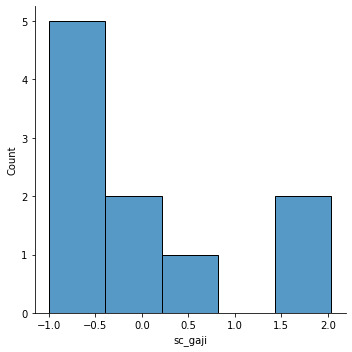

In [32]:
sns.displot(data_employee_jk['sc_gaji'])
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mx = MinMaxScaler()

In [35]:
data_employee_jk['mx_gaji'] = mx.fit_transform(data_employee[['gaji']])
data_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,sc_gaji,mx_gaji
0,1,ani,1993-03-02,1000000,0,1,-1.001779,0.000000
1,2,budi,1992-03-01,2000000,1,0,-0.663911,0.111111
2,3,susi,2000-04-05,1350000,0,1,-0.883525,0.038889
3,4,wati,1995-05-20,10000000,0,1,2.039035,1.000000
4,5,ati,1994-04-23,3400000,0,1,-0.190896,0.266667
5,6,ina,1991-05-06,5000000,0,1,0.349694,0.444444
6,7,nia,1990-04-05,2500000,0,1,-0.494977,0.166667
7,8,dodi,1998-04-03,3400000,1,0,-0.190896,0.266667
8,9,dedi,1993-06-20,8900000,1,0,1.667380,0.877778
9,10,roni,2001-09-20,2100000,1,0,-0.630124,0.122222


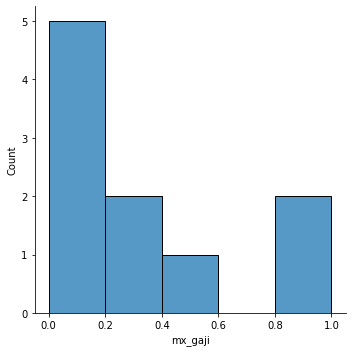

In [36]:
sns.displot(data_employee_jk['mx_gaji'])
plt.show()